In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
from sql_functions import get_dataframe

In [3]:
flights_katrina = get_dataframe('SELECT * FROM cgn_analytics_22_3.flights_katrina')
flights_katrina.info()
flights_katrina.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16331 entries, 0 to 16330
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   flight_date          16331 non-null  datetime64[ns]
 1   dep_time             14565 non-null  float64       
 2   sched_dep_time       16331 non-null  int64         
 3   dep_delay            14565 non-null  float64       
 4   arr_time             14444 non-null  float64       
 5   sched_arr_time       16331 non-null  int64         
 6   arr_delay            14444 non-null  float64       
 7   airline              16331 non-null  object        
 8   tail_number          15286 non-null  object        
 9   flight_number        16331 non-null  int64         
 10  origin               16331 non-null  object        
 11  dest                 16331 non-null  object        
 12  air_time             14444 non-null  float64       
 13  actual_elapsed_time  14444 non-

,flight_date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,airline,tail_number,flight_number,origin,dest,air_time,actual_elapsed_time,distance,cancelled,diverted
0,2005-08-20,1217.0,1125,52.0,1440.0,1349,51.0,DL,N998DL,1013,MSY,ATL,67.0,83.0,425.0,0,0
1,2005-08-20,1928.0,1930,-2.0,2147.0,2159,-12.0,DL,N922DL,1023,MSY,ATL,62.0,79.0,425.0,0,0
2,2005-08-20,723.0,725,-2.0,947.0,1006,-19.0,DL,N909DA,1024,MSY,SLC,182.0,204.0,1428.0,0,0
3,2005-08-20,1214.0,1215,-1.0,1223.0,1232,-9.0,DL,N319DL,1090,ATL,GPT,50.0,69.0,352.0,0,0
4,2005-08-20,1120.0,1116,4.0,1125.0,1123,2.0,DL,N984DL,1100,ATL,VPS,41.0,65.0,250.0,0,0


In [4]:
before_katrina = flights_katrina[(flights_katrina['flight_date'] <= '2005-08-22')]
during_katrina = flights_katrina[(flights_katrina['flight_date'] >= '2005-08-23')]

In [7]:
air_time_mean = round(before_katrina.air_time.mean(), 2)
dep_delay_mean = round(before_katrina.dep_delay.mean(), 2)
cancelled_mean = round(before_katrina.cancelled.mean()*100, 2)

print(f'mean air_time before Katrina =', air_time_mean, f'min')
print(f'mean dep_delay before Katrina =', dep_delay_mean, f'min')
print(f'mean cancelled before Katrina =', cancelled_mean, f'%')

mean air_time before Katrina = 82.39 min
mean dep_delay before Katrina = 12.32 min
mean cancelled before Katrina = 2.24 %


In [9]:
air_time_katrina = round(during_katrina.air_time.mean(), 2)
dep_delay_katrina = round(during_katrina.dep_delay.mean(), 2)
cancelled_katrina = round(during_katrina.cancelled.mean()*100, 2)

print(f'mean air_time during Katrina =', air_time_katrina, f'min')
print(f'mean dep_delay during Katrina =', dep_delay_katrina, f'min')
print(f'mean cancelled during Katrina =', cancelled_katrina, f'%')

mean air_time during Katrina = 79.99 min
mean dep_delay during Katrina = 7.48 min
mean cancelled during Katrina = 32.05 %


In [13]:
# cancelled flights result in NaN of air_time

airtime_nan_bk = before_katrina['air_time'].isna().sum()
airtime_nan_dk = during_katrina['air_time'].isna().sum()

print(f'NaN in air_time before Katrina =', airtime_nan_bk)
print(f'NaN in air_time during Katrina =', airtime_nan_dk)

NaN in air_time before Katrina = 290
NaN in air_time during Katrina = 1597


In [14]:
# cancelled flights result in NaN of dep_delay

depdelay_nan_bk = before_katrina['dep_delay'].isna().sum()
depdelay_nan_dk = during_katrina['dep_delay'].isna().sum()

print(f'NaN in dep_delay before Katrina =', depdelay_nan_bk)
print(f'NaN in dep_delay during Katrina =', depdelay_nan_dk)

NaN in dep_delay before Katrina = 260
NaN in dep_delay during Katrina = 1506


In [15]:
cancelled_bk = (before_katrina['cancelled'] == 1).sum()
cancelled_dk = (during_katrina['cancelled'] == 1).sum()

print(f'cancelled flights before Katrina =', cancelled_bk)
print(f'cancelled flights during Katrina =', cancelled_dk)

cancelled flights before Katrina = 260
cancelled flights during Katrina = 1506


In [30]:
flights_by_date = flights_katrina.groupby('flight_date').sum()
flights_by_date

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight_number,air_time,actual_elapsed_time,distance,cancelled,diverted
flight_date,,,,,,,,,,,,
2005-08-01,716555.0,715698,4334.0,797311.0,805136,3403.0,1038625,43940.0,54246.0,304002.0,5,1
2005-08-02,712291.0,714688,3042.0,800575.0,803933,2543.0,1038959,43630.0,54436.0,303146.0,4,1
2005-08-03,718670.0,717363,2812.0,803647.0,807149,2357.0,1043727,44266.0,55026.0,304980.0,3,1
2005-08-04,718858.0,715413,8326.0,784649.0,805137,9783.0,1039586,44237.0,56309.0,304628.0,6,2
2005-08-05,717822.0,717322,8589.0,786709.0,807190,9345.0,1043247,43811.0,55887.0,305232.0,8,0
2005-08-06,634466.0,638217,3287.0,707132.0,719986,2288.0,984753,39047.0,48992.0,278161.0,7,1
2005-08-07,702340.0,709862,10347.0,766588.0,796902,10380.0,1027313,42474.0,53657.0,297285.0,8,2
2005-08-08,700266.0,713748,12360.0,769668.0,803124,13879.0,1033677,43401.0,55822.0,303650.0,14,1
2005-08-09,670752.0,715799,8288.0,742468.0,805247,8342.0,1043667,42091.0,52526.0,303338.0,36,1


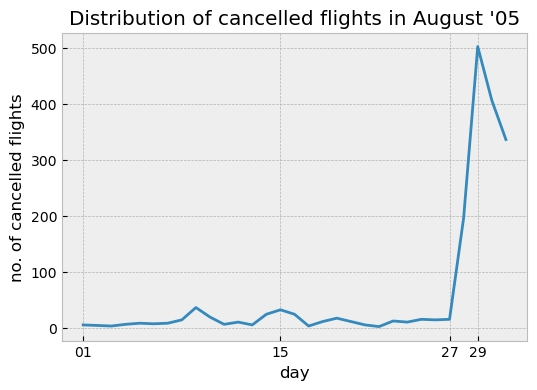

In [78]:
plt.style.use('bmh') 

plt.figure(figsize=(6, 4))

plt.plot(flights_by_date['cancelled']);

plt.xlabel('day')
plt.ylabel('no. of cancelled flights')

plt.xticks(['2005-08-01', '2005-08-15', '2005-08-27', '2005-08-29'], ['01', '15', '27', '29'])

plt.title("Distribution of cancelled flights in August '05")

plt.show()

In [83]:
PNS_origin = flights_katrina[(flights_katrina['origin'] == 'PNS')]
PNS_dest = flights_katrina[(flights_katrina['dest'] == 'PNS')]

PNS_origin_by_date = PNS_origin.groupby('flight_date').sum()
PNS_dest_by_date = PNS_dest.groupby('flight_date').sum()

In [84]:
MOB_origin = flights_katrina[(flights_katrina['origin'] == 'MOB')]
MOB_dest = flights_katrina[(flights_katrina['dest'] == 'MOB')]

MOB_origin_by_date = MOB_origin.groupby('flight_date').sum()
MOB_dest_by_date = MOB_dest.groupby('flight_date').sum()

In [85]:
BTR_origin = flights_katrina[(flights_katrina['origin'] == 'BTR')]
BTR_dest = flights_katrina[(flights_katrina['dest'] == 'BTR')]

BTR_origin_by_date = PNS_origin.groupby('flight_date').sum()
BTR_dest_by_date = PNS_dest.groupby('flight_date').sum()

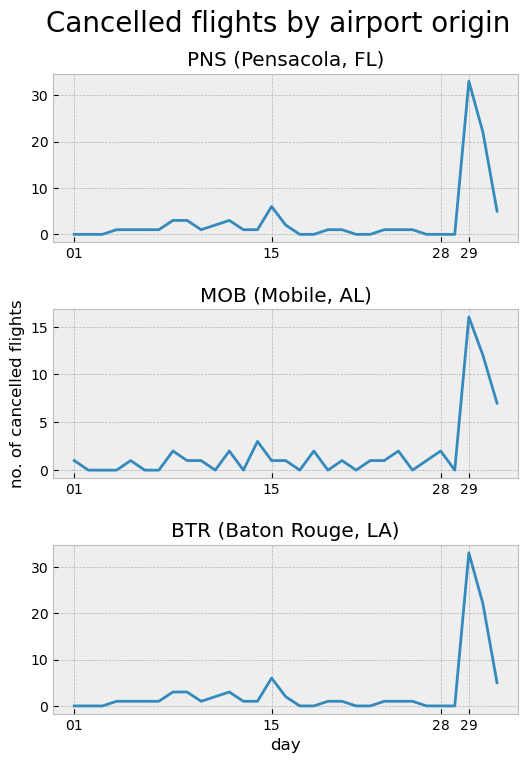

In [105]:
plt.figure(figsize=(6,8))
plt.suptitle('Cancelled flights by airport origin', fontsize=20)
plt.subplots_adjust(bottom=0.1,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.subplot(3, 1, 1)
plt.plot(PNS_origin_by_date['cancelled'])
plt.title('PNS (Pensacola, FL)')
plt.xticks(['2005-08-01', '2005-08-15', '2005-08-27', '2005-08-29'], ['01', '15', '28', '29'])

plt.subplot(3, 1, 2)  
plt.plot(MOB_origin_by_date['cancelled'])
plt.title('MOB (Mobile, AL)')
plt.ylabel('no. of cancelled flights')
plt.xticks(['2005-08-01', '2005-08-15', '2005-08-27', '2005-08-29'], ['01', '15', '28', '29'])

plt.subplot(3, 1, 3)  
plt.plot(BTR_origin_by_date['cancelled'])
plt.title('BTR (Baton Rouge, LA)')
plt.xlabel('day')
plt.xticks(['2005-08-01', '2005-08-15', '2005-08-27', '2005-08-29'], ['01', '15', '28', '29']);

#with plt.style.context('grayscale')

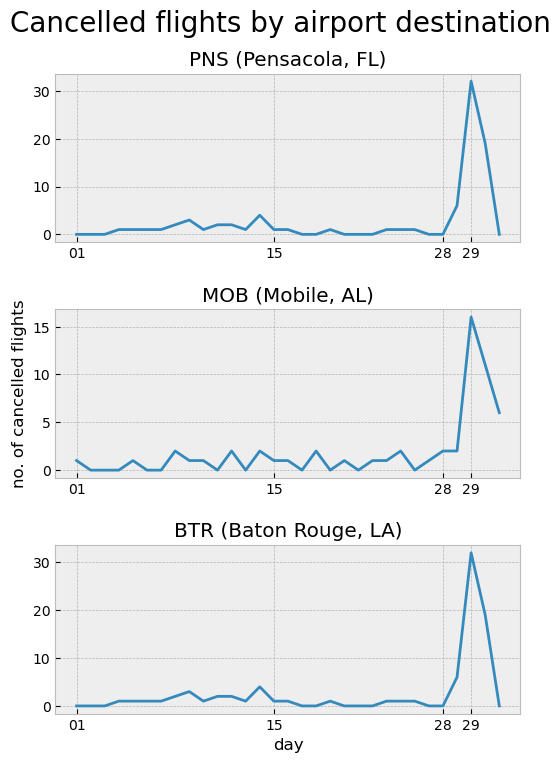

In [106]:
plt.figure(figsize=(6,8))
plt.suptitle('Cancelled flights by airport destination', fontsize=20)
plt.subplots_adjust(bottom=0.1,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.subplot(3, 1, 1)
plt.plot(PNS_dest_by_date['cancelled'])
plt.title('PNS (Pensacola, FL)')
plt.xticks(['2005-08-01', '2005-08-15', '2005-08-27', '2005-08-29'], ['01', '15', '28', '29'])

plt.subplot(3, 1, 2)  
plt.plot(MOB_dest_by_date['cancelled'])
plt.title('MOB (Mobile, AL)')
plt.ylabel('no. of cancelled flights')
plt.xticks(['2005-08-01', '2005-08-15', '2005-08-27', '2005-08-29'], ['01', '15', '28', '29'])

plt.subplot(3, 1, 3)  
plt.plot(BTR_dest_by_date['cancelled'])
plt.title('BTR (Baton Rouge, LA)')
plt.xlabel('day')
plt.xticks(['2005-08-01', '2005-08-15', '2005-08-27', '2005-08-29'], ['01', '15', '28', '29']);

#with plt.style.context('grayscale')